In [16]:
# To compare clustering algorithms few things need to be set.
# First thing is import required libraries and clusters the data.
# Second is visuallisation tools for clustering result. 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.cluster as cluster
import time
%matplotlib inline
sns.set_context('poster')
sns.set_color_codes()
plot_kwds = {'alpha' : 0.25, 's' : 80, 'linewidths':0}

In [17]:
# Loaded the cluster dataset
data = np.load('cluster_data.npy')

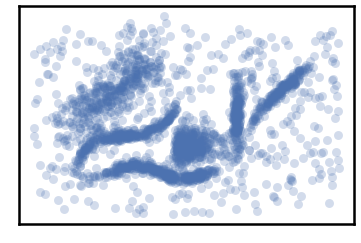

In [18]:
# scatter ploting the dataset
plt.scatter(data.T[0], data.T[1], c='b', **plot_kwds)
frame = plt.gca()
frame.axes.get_xaxis().set_visible(False)
frame.axes.get_yaxis().set_visible(False)

In [19]:
# Establishing a little function to do clustering and plot the result.
def plot_clusters(data, algorithm, args, kwds):
    start_time = time.time()
    labels = algorithm(*args, **kwds).fit_predict(data)
    end_time = time.time()
    palette = sns.color_palette('deep', np.unique(labels).max() + 1)
    colors = [palette[x] if x >= 0 else (0.0, 0.0, 0.0) for x in labels]
    plt.scatter(data.T[0], data.T[1], c=colors, **plot_kwds)
    frame = plt.gca()
    frame.axes.get_xaxis().set_visible(False)
    frame.axes.get_yaxis().set_visible(False)
    plt.title('Clusters found by {}'.format(str(algorithm.__name__)), fontsize=24)
    plt.text(-0.5, -0.4, 'Clustering took {:.2f}s'.format(end_time - start_time), fontsize=14)
    plt.text(-0.5, -0.5, 'No. of Cluster are = {:<.0f}'.format(len(np.unique(labels))), fontsize=14)

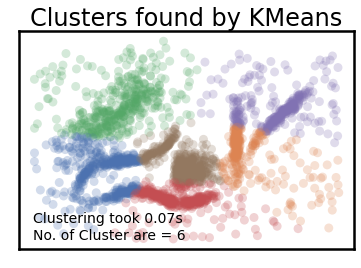

In [6]:
# Ploting K Mean cluster
plot_clusters(data, cluster.KMeans, (), {'n_clusters':6})

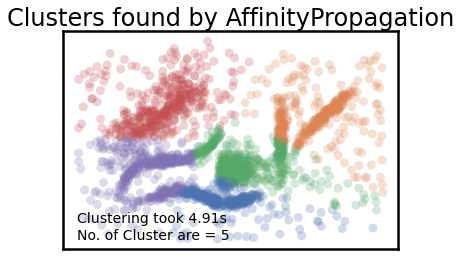

In [7]:
# Ploting Affinity Propagation cluster
plot_clusters(data, cluster.AffinityPropagation, (), {'preference':-6.0, 'damping':0.95})

Estimated number of clusters: 5


Text(0, 0.5, 'Feature 2')

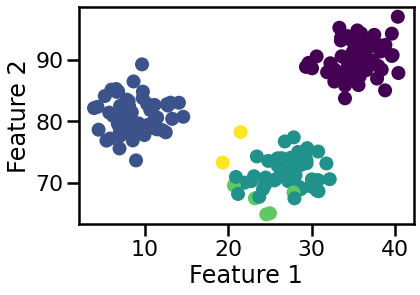

In [9]:
#Bandwidth Estimation for Mean Shift
import numpy as np
import pandas as pd
from sklearn.cluster import MeanShift,estimate_bandwidth
from sklearn.datasets import make_blobs
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline
  
clusters = [[27, 72, 91], [36, 90, 99], [9, 81, 99]]

#Making the random data set
X, _ = make_blobs(n_samples = 180, centers = clusters,
                                   cluster_std = 2.79)

# Estimating the bandwith (or the radius which needs to be taken as part of step 2)
bandwidth = estimate_bandwidth(X, quantile=0.1, n_samples=700)
meanshift = MeanShift(bandwidth=bandwidth)
meanshift.fit(X)
labels = meanshift.labels_
labels_unique = np.unique(labels)
n_clusters_ = len(labels_unique)

print('Estimated number of clusters: ' + str(n_clusters_))

y_pred  = meanshift.predict(X)
plt.scatter(X[:, 0], X[:, 1], c=y_pred, cmap="viridis")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")

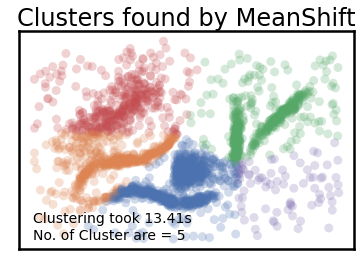

In [8]:
# Ploting MeanShift cluster
plot_clusters(data, cluster.MeanShift, (), {'bandwidth':0.19, 'cluster_all':True})

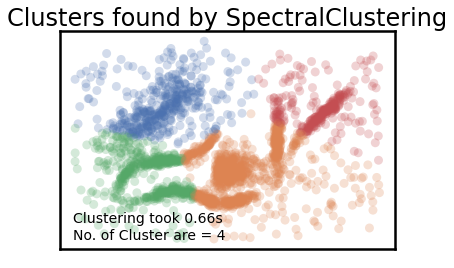

In [10]:
# Ploting Spectral cluster
plot_clusters(data, cluster.SpectralClustering, (), {'n_clusters':4})

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2])

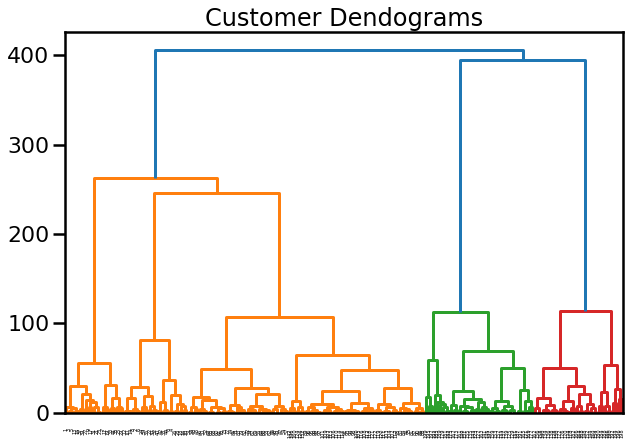

In [11]:
# Dendogram for Agglomerative cluster
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.cluster.hierarchy as shc
from sklearn.cluster import AgglomerativeClustering

# Load data
customer_data = pd.read_csv('shopping-data.csv')
customer_data.shape
customer_data.head()
data = customer_data.iloc[:, 3:5].values

# Plot dendrogram
plt.figure(figsize=(10, 7))
plt.title("Customer Dendograms")
dend = shc.dendrogram(shc.linkage(data, method='ward'))

# Agglomerative Clustering
cluster = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
cluster.fit_predict(data)

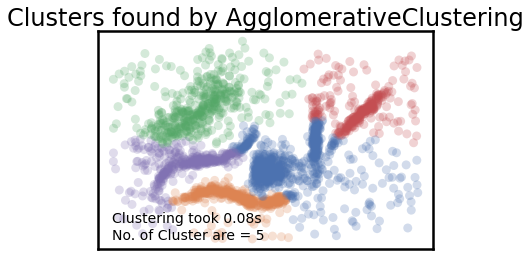

In [20]:
# Ploting Agglomerative cluster
plot_clusters(data, cluster.AgglomerativeClustering, (), {'n_clusters':5, 'linkage':'ward'})

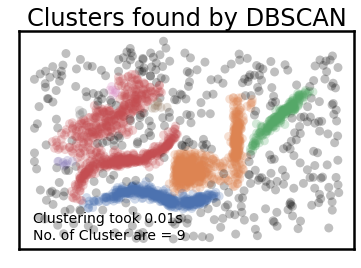

In [21]:
# Ploting DBSCAN cluster
plot_clusters(data, cluster.DBSCAN, (), {'eps':0.025})

In [24]:
#Installing hdbscan
!pip install hdbscan

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 5.2 MB 32.4 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for hdbscan: filename=hdbscan-0.8.29-cp37-cp37m-linux_x86_64.whl size=2340740 sha256=8dcc6265e44cd663f7ddef12e3c529e1c64ff9abcff04534d5f821667b98792d
  Stored in directory: /root/.cache/pip/wheels/93/78/2e/03ee191669a772e9653260aa3bd53e0b1a768751a9676e8c82
Successfully built hdbscan


In [25]:
#Importing hdbscan as they are not a part of sklearn clustering 
import hdbscan

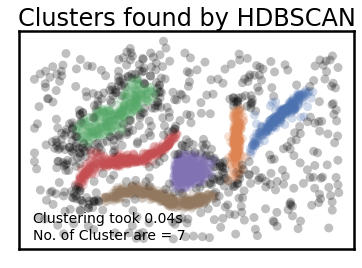

In [26]:
# Ploting HDBSCAN cluster
plot_clusters(data, hdbscan.HDBSCAN, (), {'min_cluster_size':17})